# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
library(tm)

options(repr.plot.width = 16, repr.plot.height = 9, repr.matrix.max.rows = 10000, repr.matrix.max.cols = 10000)

Loading required package: NLP



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 43

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 43

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”


<<DocumentTermMatrix (documents: 43, terms: 11827)>>
Non-/sparse entries: 58918/449643
Sparsity           : 88%
Maximal term length: 33
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs                folks    hussein         iraq       iraqi         must
  1981 Reagan 0.000000000 0.00000000 0.0000000000 0.000000000 6.245033e-04
  1986 Reagan 0.000000000 0.00000000 0.0000000000 0.000000000 1.049442e-03
  1987 Reagan 0.000000000 0.00000000 0.0000000000 0.000000000 6.430611e-04
  2003 GWBush 0.000000000 0.02038092 0.0033408194 0.004757371 6.489495e-04
  2007 GWBush 0.000000000 0.00000000 0.0053305755 0.006777509 6.471605e-04
  2017 Trump  0.000000000 0.00000000 0.0000000000 0.000000000 7.824271e-04
  2018 Trump  0.000000000 0.00000000 0.0003112792 0.000000000 2.351438e-04
  2019 Trump  0.000000000 0.00000000 0.0006253772 0.000000000 6.411373e-04
  2020 Trump  0.000000000 0.00000000 0.0010971156 0.000000000 

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

Warning message in TermDocumentMatrix.SimpleCorpus(docs_c, control = list(weighting = weightTfIdf)):
“custom functions are ignored”


<<TermDocumentMatrix (terms: 11827, documents: 43)>>
Non-/sparse entries: 58918/449643
Sparsity           : 88%
Maximal term length: 33
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
         Docs
Terms      1981 Reagan 1986 Reagan  1987 Reagan  2003 GWBush  2007 GWBush
  folks   0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0000000000
  hussein 0.0000000000 0.000000000 0.0000000000 0.0203809249 0.0000000000
  iraq    0.0000000000 0.000000000 0.0000000000 0.0033408194 0.0053305755
  iraqi   0.0000000000 0.000000000 0.0000000000 0.0047573711 0.0067775091
  must    0.0006245033 0.001049442 0.0006430611 0.0006489495 0.0006471605
  propose 0.0003596846 0.000000000 0.0008642037 0.0011628227 0.0005798086
  saddam  0.0000000000 0.000000000 0.0000000000 0.0186540231 0.0000000000
  soviet  0.0005723822 0.002834943 0.0068762297 0.0004626130 0.0000000000
  terror  0.0000000000 0.001753843 0.0000000000 0.0022895715 0.0019027165
  

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"  "industry"   "inflation"  "must"       "oil"       
 [6] "propose"    "recovery"   "reduction"  "soviet"     "space"     
[11] "thats"      "welfare"    "—"          "lets"       "regime"    
[16] "college"    "usa"        "revolution" "terrorists" "drugs"     
[21] "terror"     "kids"       "terrorist"  "border"     "hussein"   
[26] "iraq"       "saddam"     "iraqi"      "folks"      "gun"       
[31] "audience"   "qaida"      "iraqis"     "covid"

## Visualizations

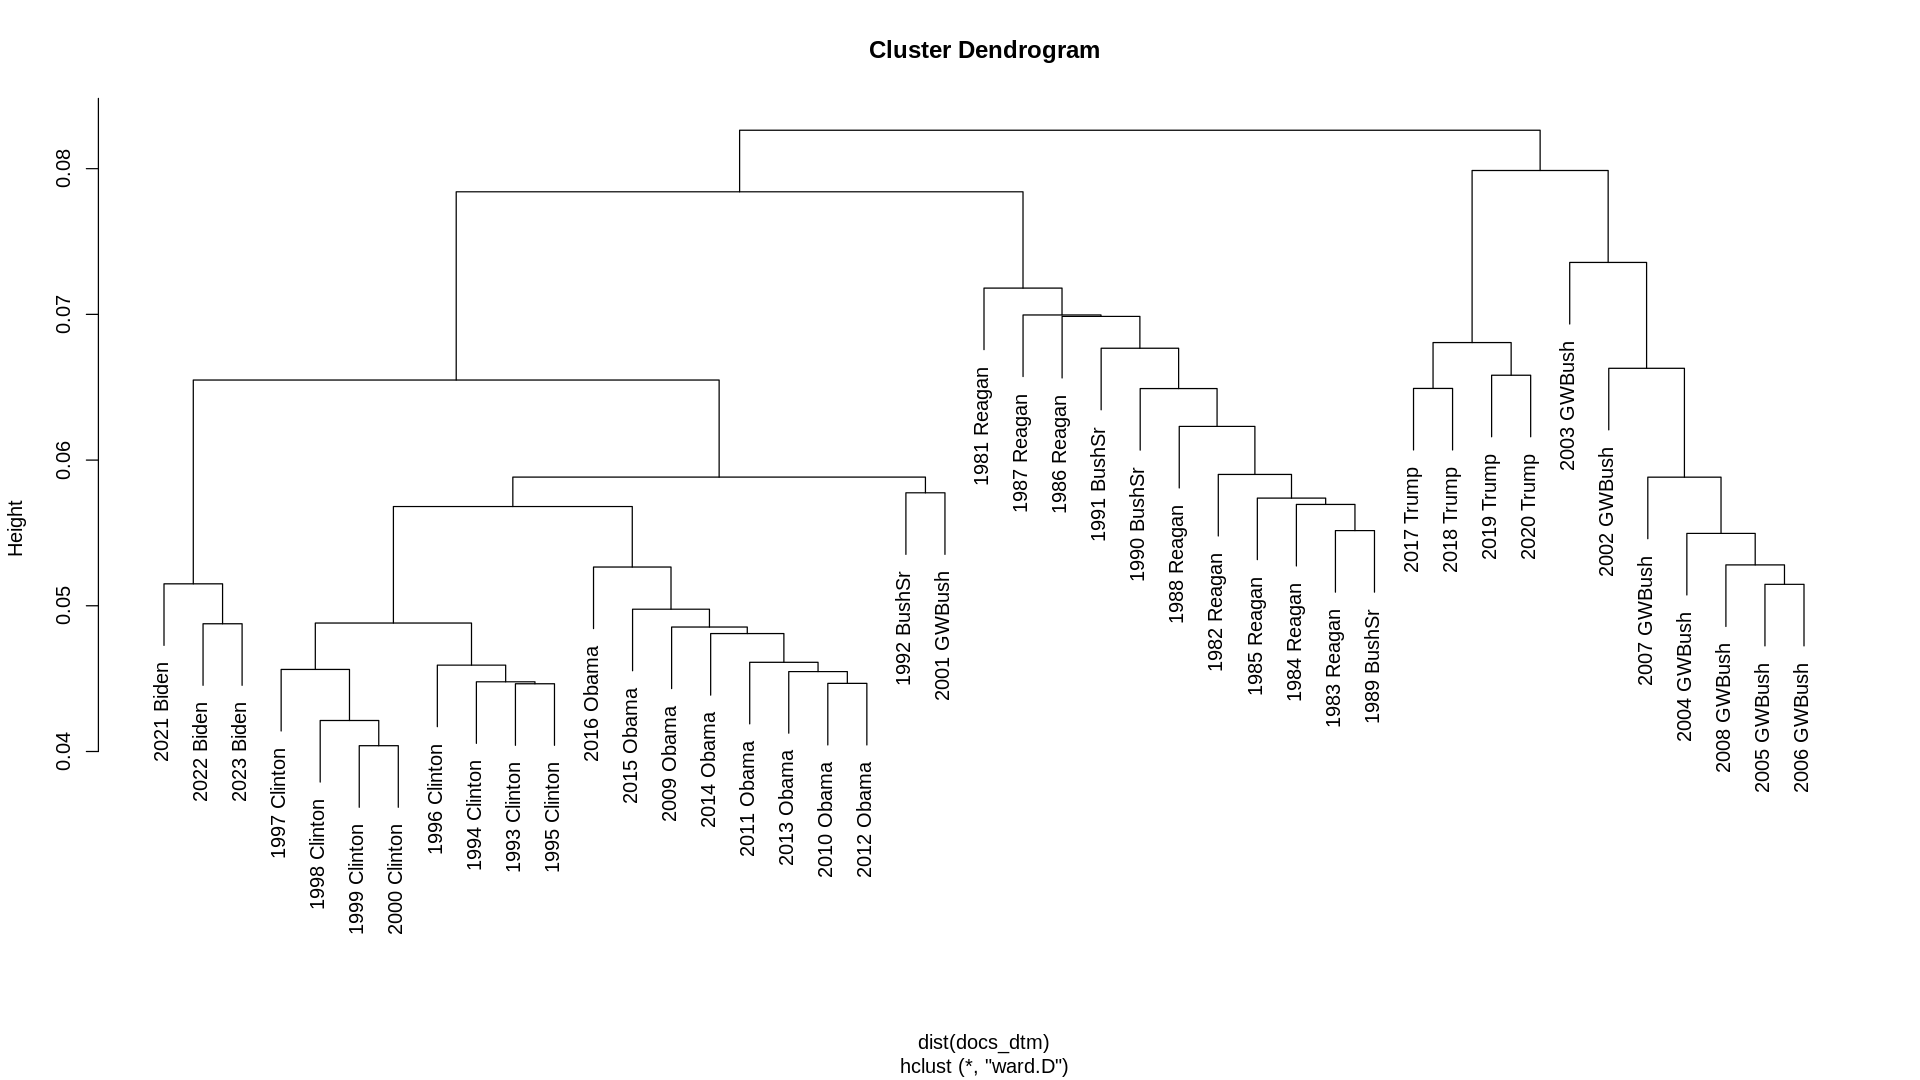

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))